In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# using linspace(start, stop, num) to generate the values in X equally distributed between 0 and 20
# num is 50 (default)
X = np.linspace(0, 20)
y = -2*X + 1 

In [48]:
def create_batch(x,y,batch_size):
    data = np.stack((x,y), axis = 1)
    np.random.shuffle(data)
    no_of_batches = len(x)//batch_size
    mini_batches =[]
    for i in range(no_of_batches):
        mini_batch = data[i*batch_size: (i+1)*batch_size] 
        mini_batches.append((mini_batch[:,0],mini_batch[:,1]) )
    if len(x)%no_of_batches !=0:
        mini_batch = data[i*batch_size:] 
        mini_batches.append((mini_batch[:,0],mini_batch[:,1]) )
    
    return mini_batches
    
    

In [74]:
def mini_batch_GD(x,y,alpha, batch_size):
    #1. Initialize parameters (theta_0 & theta_1) with zero.
    theta_0 = 0
    theta_1 = 0
    
    thetas_0 = []
    thetas_1 = []
    js = []
    no_of_batches = len(x)//batch_size
    #7. Repeat from 2 to 6 until converge to the minimum or achieve maximum iterations.
    for i in range(1000):
        for x_batch, y_batch in create_batch(x,y,batch_size):
            #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x
            hx = theta_0 + (theta_1 * x_batch)

            #3. Calculate Cost function 𝑱(theta_0,theta_1 )
            j = (np.sum(hx - y_batch)**2)/(2*len(x))

            thetas_0.append(theta_0)
            thetas_1.append(theta_1)
            js.append(j)

            #4. Calculate the gradient
            g_theta_0 = np.sum(hx - y_batch)/len(x_batch)
            g_theta_1 = np.sum((hx-y_batch) * x_batch)/len(x_batch)

            #5. Update the parameters (simultaneously)
            theta_0 = theta_0 - (alpha * g_theta_0)
            theta_1 = theta_1 - (alpha * g_theta_1)
        #print(abs(js[(i-1)*f] - js[i*f]) )
        #7. Stop condition
        if i>1 and abs(js[(i-1)*no_of_batches] - js[i*no_of_batches]) < 0.001:
            break;

    return i, thetas_0, thetas_1, js

In [75]:
i, thetas_0, thetas_1, js = mini_batch_GD(X,y,0.0001, 4)

In [76]:
print(f'''the function has been iterating {i} times\nand the min cost is {js[-1]}''')

the function has been iterating 28 times
and the min cost is 0.004051384875436712


In [77]:
yhat = thetas_0[-1] + thetas_1[-1] * X

Text(0.5, 1.0, 'best peridected fitting line for 28 iterations')

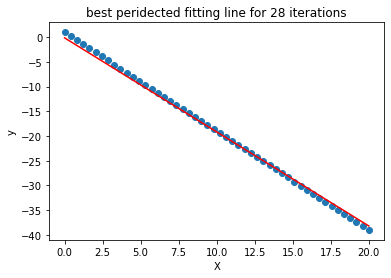

In [78]:
plt.scatter(X,y)
plt.plot(X, yhat, color ='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"best peridected fitting line for {i} iterations")

Text(0.5, 1.0, 'Epochs vs Cost function')

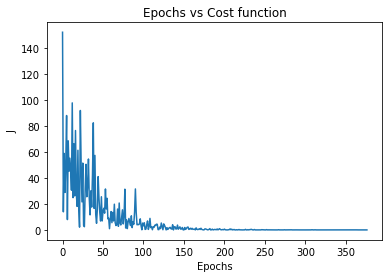

In [79]:
plt.plot( js)
plt.xlabel("Epochs")
plt.ylabel("J")
plt.title("Epochs vs Cost function")

Text(0.5, 1.0, 'theta 0 vs cost function')

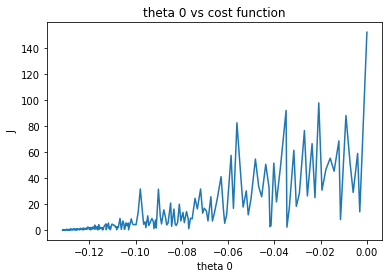

In [82]:
# theta 0
plt.plot(thetas_0,js)
plt.xlabel("theta 0")
plt.ylabel("J")
plt.title("theta 0 vs cost function")

Text(0.5, 1.0, 'theta 1 vs cost function')

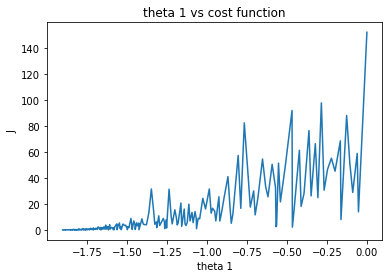

In [83]:
# theta 1
plt.plot(thetas_1,js)
plt.xlabel("theta 1")
plt.ylabel("J")
plt.title("theta 1 vs cost function")

In [84]:
from sklearn.metrics import r2_score
print(f"The accuracy is {int(r2_score(y, yhat)*100)}%")


The accuracy is 99%
